# PARETO - Strategic Model Tracking Water Quality and Sensitivity Analysis
This Jupyter notebook provides an overview of the water quality and treatment module within PARETO's strategic model, highlighting its advanced capabilities for managing produced water networks with water quality constraints.

## Water Quality Challenges in Practice: 
In daily operations, maintaining water quality is crucial to minimizing issues such as corrosion and scaling, while in the long term, it informs treatment technology selection and performance evaluation.
 
PARETO’s water quality module supports: 
- tracking constituent propagation
- capturing water quality fluctuations
- Managing and blending water to meet specified quality standards

This notebook demonstrates PARETO's capability to track water quality and optimize the produced water network to minimize TDS at specific locations.

The rest of this demonstration is organized as follows:
1. [Water quality module data requirements](#data)
2. [Set up and solve Pyomo model](#solve)
3. [Add additional quality constraints to the model](#additional_constraints)

## Case Study
This demo is based on PARETO's strategic toy case study. Relevant links:
- [Strategic model documentation](https://pareto.readthedocs.io/en/latest/model_library/strategic_water_management/index.html)
- [Documentation of PARETO case studies](https://pareto.readthedocs.io/en/latest/case_studies/index.html)

The Strategic Toy case study presents a small yet realistic produced water network. The compact size of this example makes it ideal for testing, debugging, and demonstrations. Below is a schematic representation of the Strategic Toy network.

![Strategic toy case study network](./strategic_toy_network.png)


## <a id='data'></a> 1. Water quality module data requirements

To track water quality, the following inputs are required:
- Initial water quality in storage
- Water quality at production and completions pads
- Potential desalination technology types, installation locations, removal efficiency, and recovery rates (treatment efficiency)

### Storage initial water quality
In the "StorageInitialWaterQuality" tab, specify the initial water quality for each storage site.

![Storage initial quality](./data_input_storage_initial_quality.png)

### Pad storage initial water quality
In the "PadStorageInitialWaterQuality" tab, specify the initial water quality in the built-in storage at each completions pad.

![Pad storage initial quality](./data_input_pad_storage_initial_quality.png)

### Pad water quality
In the "PadWaterQuality" tab, specify the concentration of each water quality component in the produced water from each production and completions pad.
Please note that the column headers in this tab define the quality components included in the model, as there is no separate tab for specifying them. In the screenshot below, TDS is the only quality component.

![Pad water quality](./data_input_pad_water_quality.png)


### Treatment technologies
Since the objective is to minimize TDS concentration reaching the desalination technologies, this case study includes the option to install various desalination technologies.

![Treatment technologies](./data_input_treatment_technologies.png)

In the list above, the abbreviations represent the following treatment technologies:
- CB: Clean brine. This is a catch-all term meant to refer to any non-desalination treatment technology. 
- CB-EV: Clean brine with enhanced evaporation. Clean brine treatment, but also includes specailized equipment used to increase the rate of evaporation of wastewater from a storage pond into the atmosphere.
- MVC: Mechanical vapor compression desalination.
- MD: Membrane distillation desalination.
- OARO: Osmotically assisted reverse osmosis desalination.

For a detailed description of the inputs required to run this case study, please refer to the [PARETO case study documentation](https://pareto.readthedocs.io/en/latest/case_studies/index.html).

## <a id='solve'></a> 2. Set up and solve Pyomo model
The following code creates and solves the Pyomo model and exports the optimization results to an Excel workbook:

In [6]:
#####################################################################################################
# PARETO was produced under the DOE Produced Water Application for Beneficial Reuse Environmental
# Impact and Treatment Optimization (PARETO), and is copyright (c) 2021-2023 by the software owners:
# The Regents of the University of California, through Lawrence Berkeley National Laboratory, et al.
# All rights reserved.
#
# NOTICE. This Software was developed under funding from the U.S. Department of Energy and the U.S.
# Government consequently retains certain rights. As such, the U.S. Government has been granted for
# itself and others acting on its behalf a paid-up, nonexclusive, irrevocable, worldwide license in
# the Software to reproduce, distribute copies to the public, prepare derivative works, and perform
# publicly and display publicly, and to permit others to do so.
#####################################################################################################

from pareto.strategic_water_management.strategic_produced_water_optimization import (
    WaterQuality,
    create_model,
    Objectives,
    solve_model,
    PipelineCost,
    PipelineCapacity,
)
from pareto.utilities.get_data import get_data
from pareto.utilities.results import (
    generate_report,
    PrintValues,
    OutputUnits,
    is_feasible,
    nostdout,
)
from importlib import resources
from pyomo.environ import Constraint, value, units

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from ipywidgets import FloatText, Button, Layout, GridspecLayout, ToggleButtons
from IPython.display import display

from os import remove

# Load data from Excel input file into Python
with resources.path(
    "pareto.case_studies",
    "strategic_toy_case_study.xlsx",
) as fpath:
    [df_sets, df_parameters] = get_data(fpath)

# Create Pyomo optimization model representing the produced water network
strategic_model = create_model(
    df_sets,
    df_parameters,
    default={
        "objective": Objectives.cost,
        "pipeline_cost": PipelineCost.distance_based,
        "pipeline_capacity": PipelineCapacity.input,
        "node_capacity": True,
        "water_quality": WaterQuality.post_process,
    },
)

# Solve Pyomo model with specified options
options = {
    "deactivate_slacks": True,
    "scale_model": False,
    "scaling_factor": 1000000,
    "running_time": 300,
    "gap": 0,
    "gurobi_numeric_focus": 1,
}
results_obj = solve_model(model=strategic_model, options=options)

# Check feasibility of the solved model
def check_feasibility(model):
    with nostdout():
        feasibility_status = is_feasible(model)
    if not feasibility_status:
        print("Model results are not feasible and should not be trusted")
    else:
        print("Model results validated and found to pass feasibility tests")


check_feasibility(strategic_model)

[model, results_dict] = generate_report(
    strategic_model,
    # is_print=[PrintValues.essential],
    output_units=OutputUnits.user_units,
    fname="strategic_optimization_results_SRA_post_process.xlsx",
)

C:\Users\Elmira\AppData\Local\Temp\ipykernel_10340\3438486286.py:46: UserWarning:

Invalid PARETO input has been provided. Check that the input tab names match valid PARETO input. If you'd like to read custom tabs (e.g., PARETO output files), please pass a list of the custom tab names to get_data(). The following tabs are not standard PARETO inputs for the selected model type: ['ProductionTanks']

Loading failed for sheet 'RKA': ValueError('Passed header=[1], len of 1, but only 1 lines in file (sheet: RKA)')
Loading failed for sheet 'RKT': ValueError('Passed header=[1], len of 1, but only 1 lines in file (sheet: RKT)')
c:\users\elmira\documents\pareto2\project-pareto\pareto\utilities\get_data.py:287: UserWarning:

Data loading failed for the following sheets: 
	RKA	Passed header=[1], len of 1, but only 1 lines in file (sheet: RKA)
	RKT	Passed header=[1], len of 1, but only 1 lines in file (sheet: RKT)
This may be because the sheets are empty (possibly excepting a header).
For these she

Setting currency to: USD
ModuleNotFoundError: No module named 'gurobipy'
Model solved using gurobi


**************************************************
                Solving unscaled model
**************************************************
Read LP format model from file C:\Users\Elmira\AppData\Local\Temp\tmpgjgnxzpk.pyomo.lp
Reading time = 0.08 seconds
x1: 14186 rows, 12933 columns, 57051 nonzeros
Set parameter TimeLimit to value 300
Set parameter MIPGap to value 0
Set parameter NumericFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13950HX, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 14186 rows, 12933 columns and 57051 nonzeros
Model fingerprint: 0x773116bf
Variable types: 9064 continuous, 3869 integer (3869 binary)
Coefficient statistics:
  Matrix range     [1e-04, 4e+06]
  Objective range  [1e+00, 1e+

### 2.1 Strategic model results (minimize cost)


In [7]:
# Function to extract R01 buildout results
def get_R01_results(results_dict):
    for datapt in results_dict["vb_y_Treatment_dict"][1:]:
        site, technology, capacity, built = datapt
        if site == "R01" and built == 1:
            return technology, capacity


# Extract R01 buildout results for default solved model
technology, capacity = get_R01_results(results_dict)
print(
    "For this case, PARETO recommends installing a desalination plant in R01 location"
)
print(f"Technology: {technology}")
print(f"Capacity: {capacity}")
print(f"Objective function value: {value(strategic_model.v_Z)}")

# Check what capacity J1 corresponds to (in bbl/day)
print(
    "Desalination plant capacity bbl/day =",
    df_parameters["TreatmentCapacityIncrements"][("MVC", "J1")],
)

For this case, PARETO recommends installing a desalination plant in R01 location
Technology: MVC
Capacity: J2
Objective function value: 6122.517820955118
Desalination plant capacity bbl/day = 10000


The following demonstrates the extraction of treatment buildout results at R01, showing water TDS fluctuations over time without any imposed limitations.

p_nu_pad : Water Quality at pad [concentration]
    Size=5, Index=s_P*s_QC, Domain=Any, Default=0, Mutable=True, Units=kg/l
    Key             : Value
    ('CP01', 'TDS') :            0.165376
    ('PP01', 'TDS') :            0.142277
    ('PP02', 'TDS') : 0.14099799999999998
    ('PP03', 'TDS') :           0.1724902
    ('PP04', 'TDS') : 0.25754699999999997


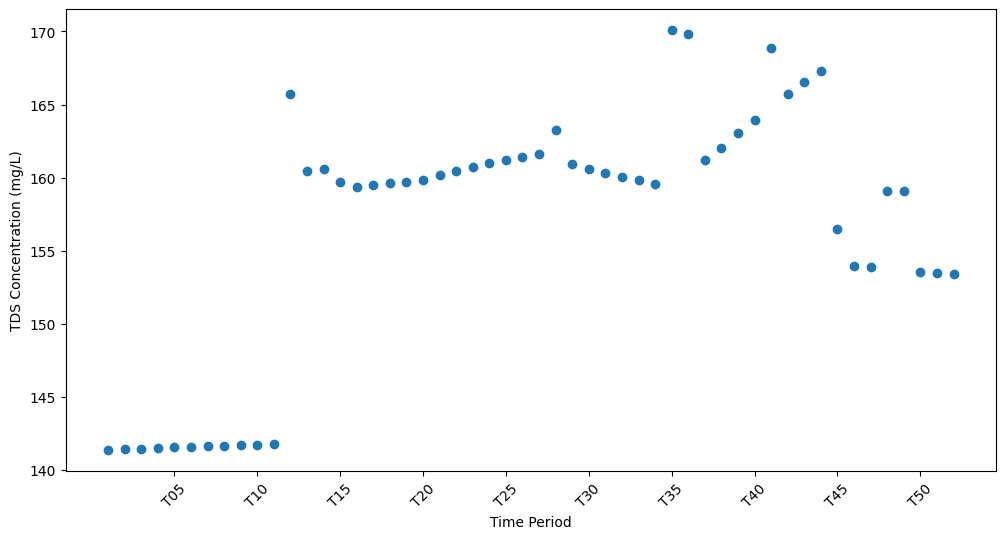

In [10]:
import matplotlib.pyplot as plt

strategic_model.quality.p_nu_pad.display()

time_period = []
TDS = []

for i in strategic_model.s_T:
    TDS.append(1000 * value(strategic_model.quality.v_Q["R01", "TDS", i]))
    time_period.append(i)

plt.figure(figsize=(12, 6))  
plt.scatter(range(len(time_period)), TDS)
plt.xlabel("Time Period")
plt.ylabel("TDS Concentration (mg/L)")

selected_ticks = [i for i in range(len(time_period)) if int(time_period[i][1:]) % 5 == 0]
selected_labels = [time_period[i] for i in selected_ticks]

plt.xticks(ticks=selected_ticks, labels=selected_labels, rotation=45)

plt.show()

## <a id='additional_constraints'></a> 3. Add additional quality constraints to the model
Next, we solve the model to minimize the TDS received at R01.

In [15]:
from pareto.utilities.model_modifications import free_variables, deactivate_slacks

# Step 2.1: unfix variables (MILP model)
discrete_variables_names = {"v_X"}
free_variables(strategic_model, discrete_variables_names)
deactivate_slacks(strategic_model)
strategic_model.quality.objective.deactivate()
strategic_model.ObjectiveFunctionCost.deactivate()

from pyomo.environ import Constraint, SolverFactory, Param

strategic_model.penalty = Param(initialize=10, mutable=True)
from pareto.utilities.solvers import get_solver


def CostObjectiveFunctionRule2(model):
    return model.v_Z == (
        model.v_C_TotalSourced
        + model.v_C_TotalDisposal
        + model.v_C_TotalTreatment
        + model.v_C_TotalReuse
        + model.v_C_TotalPiping
        + model.v_C_TotalStorage
        + model.v_C_TotalTrucking
        + model.p_alpha_AnnualizationRate
        * (
            model.v_C_DisposalCapEx
            + model.v_C_StorageCapEx
            + model.v_C_TreatmentCapEx
            + model.v_C_PipelineCapEx
        )
        + model.v_C_Slack
        - model.v_R_TotalStorage
        + model.penalty
        * sum(model.quality.v_Q["R01", w, t] for w in model.s_QC for t in model.s_T)
    )


strategic_model.ObjectiveFunction = Constraint(
    rule=CostObjectiveFunctionRule2, doc="MINLP objective function"
)

minlp_solver_source = "gams"
if minlp_solver_source == "gams":
    mathoptsolver = "dicopt"
    solver_options = {
        "tol": 1e-3,
        "max_iter": 1000,
        "constr_viol_tol": 0.009,
        "acceptable_constr_viol_tol": 0.01,
        "acceptable_tol": 1e-6,
        "mu_strategy": "adaptive",
        "mu_init": 1e-10,
        "mu_max": 1e-1,
        "print_user_options": "yes",
        "warm_start_init_point": "yes",
        "warm_start_mult_bound_push": 1e-60,
        "warm_start_bound_push": 1e-60,
    }
    import os

    if not os.path.exists("temp"):
        os.makedirs("temp")

    with open("temp/" + mathoptsolver + ".opt", "w") as f:
        for k, v in solver_options.items():
            f.write(str(k) + " " + str(v) + "\n")

    results = SolverFactory(minlp_solver_source).solve(
        strategic_model,
        tee=True,
        keepfiles=True,
        solver=mathoptsolver,
        tmpdir="temp",
        add_options=["gams_model.optfile=1;"],
    )

elif minlp_solver_source == "gurobi":
    mathoptsolver = "gurobi"
    solver = SolverFactory(mathoptsolver)
    solver.options["timeLimit"] = 1500
    solver.options["NonConvex"] = 2
    solver.options["MIPGap"] = 0.5

    results = solver.solve(strategic_model, tee=True)


elif minlp_solver_source == "baron":
    solver = SolverFactory("baron")
    results = solver.solve(strategic_model, tee=False)

'pyomo.core.base.param.ScalarParam'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.param.ScalarParam'>). This is usually indicative
of a modelling error. To avoid this warning, use block.del_component() and
block.add_component().
(type=<class 'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown
with a new Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
--- Job model.gms Start 02/25/25 11:25:06 46.5.0 a671108d WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\46\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\Elmira\Documents\pareto2\project-pareto\pareto\examples\water_tracking\temp\model.gms
    Output C:\Users\Elmira\Documents\pareto2\project-pareto\pareto\examples\water_tracking\temp\output.lst
    ScrDir C:\Users\Elmira\Documents\pareto2\project-pareto\pareto\examples\water_tr

After solving the model to minimize the inlet feed TDS concentration at R01, the optimizer has again selected MVC desalination, but with a lower received TDS concentration. The following extracts the buildout results for R01 with minimized received TDS and plots TDS over time.

PARETO recommends installing a desalination plant at R01.
Selected Technology: MVC
Plant Capacity: J2 bbl/day
Objective Function Value: 15611.333141393141
Desalination plant capacity (bbl/day) = 10000


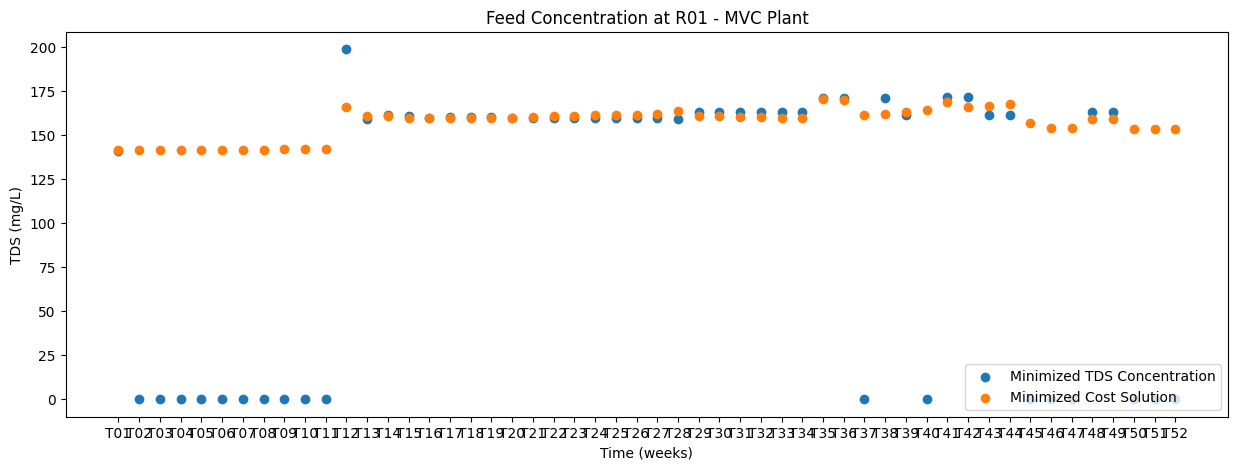

In [17]:
# Extract buildout results for R01 from the optimized model
technology, capacity = get_R01_results(results_dict)

print("PARETO recommends installing a desalination plant at R01.")
print(f"Selected Technology: {technology}")
print(f"Plant Capacity: {capacity} bbl/day")
print(f"Objective Function Value: {value(strategic_model.v_Z)}")

# Retrieve the corresponding capacity for J1 in bbl/day
print(
    "Desalination plant capacity (bbl/day) =",
    df_parameters["TreatmentCapacityIncrements"][("MVC", "J1")],
)

# Extract re-optimized TDS values over time
TDS_reopt = []
time = []
for i in strategic_model.s_T:
    TDS_reopt.append(1000 * value(strategic_model.quality.v_Q["R01", "TDS", i]))
    time.append(i)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(time_period)), TDS_reopt, label="Minimized TDS Concentration")
plt.scatter(range(len(time_period)), TDS, label="Minimized Cost Solution", alpha=0.7)

plt.xlabel("Time Period")
plt.ylabel("TDS Concentration (mg/L)")
plt.title("Feed Concentration at R01 - MVC Plant")

selected_ticks = [i for i in range(len(time_period)) if int(time_period[i][1:]) % 5 == 0]
selected_labels = [time_period[i] for i in selected_ticks]

plt.xticks(ticks=selected_ticks, labels=selected_labels, rotation=45)
plt.legend(loc="center right") 
plt.show()


As observed, PARETO optimized water blending by redirecting high-TDS produced water to the clean brine site while sending lower-TDS water to the desalination plant. As expected, this adjustment impacted the overall network cost, affecting both OPEX and CAPEX.